# Decision Tree를 이용한 와인데이터 분석

### 레드와인 화이트와인 분류기

In [4]:
import pandas as pd
red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url,sep=';')
white_wine = pd.read_csv(white_url,sep=';')

In [5]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


두 데이터의 구조는 동일

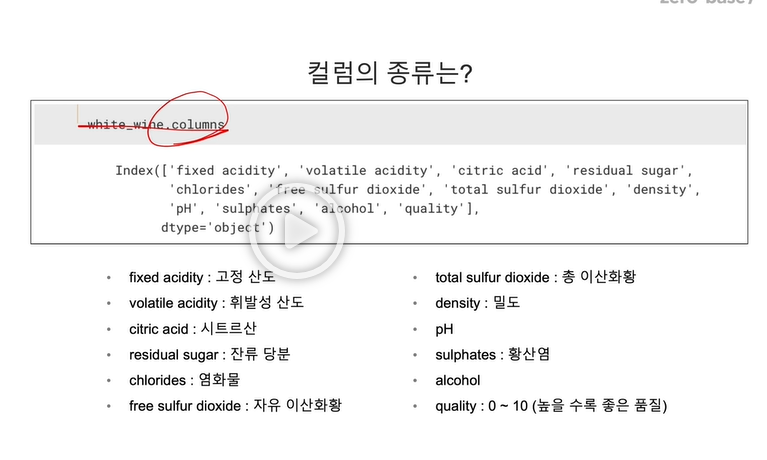

In [7]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

1) 두 데이터를 하나로 합치기

In [8]:
red_wine['color'] = 1 
white_wine['color'] = 0

wine = pd.concat([red_wine,white_wine])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


2. 와인 퀄리티 데이터 탐색

In [10]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [11]:
import plotly_express as px

fig = px.histogram(wine, x='quality')
fig.show()

In [12]:
wine['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [13]:
fig = px.histogram(wine, x='quality', color='color')
fig.show()

3. 라벨분리 

In [14]:
X = wine.drop(columns='color',axis=1)
Y = wine['color']

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=13)

In [17]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

훈련용과 테스트용이 레드/화이트 와인에 따라 어느정도 구분되었을까?

In [20]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Histogram(x=X_train['quality'], name = 'Train'))
fig.add_trace(go.Histogram(x=X_test['quality'], name = 'Test'))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.7)
fig.show()

3. 결정나무 훈련

In [21]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [22]:
from sklearn.metrics import accuracy_score

y_pred_tr = wine_tree.predict(X_train) #훈련데이터에 대한 정확도검증
y_pred_test = wine_tree.predict(X_test)


In [24]:
accuracy_score(y_train,y_pred_tr)

0.9553588608812776

In [25]:
accuracy_score(y_test,y_pred_test)

0.9569230769230769

우선 훈련데이터와 테스트데이터에 대해 정확도는 95%정도로 동일한 결과가 나왔다.

---

데이터 전처리

In [26]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
fig = go.Figure()
fig.add_trace(go.Box(y=X['fixed acidity'], name ='fixed acidity'))
fig.add_trace(go.Box(y=X['chlorides'], name ='chlorides'))
fig.add_trace(go.Box(y=X['quality'], name ='quality'))
fig.show()

일반적으로 컬럼들간에 범위 격차가 클 경우에 제대로 학습이 안될 수도 있다.

- 그럼 전처리를 해서 좋은지, 한다면 minmax,standard,robust중에 어떤것이 좋은지는 해봐야 한다.

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()
ss = StandardScaler()

mms.fit(X)
ss.fit(X)

X_ss=ss.transform(X)
X_mms= mms.transform(X)

In [29]:
X_ss_pd = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns=X.columns)

In [31]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_mms_pd['fixed acidity'], name ='fixed acidity'))
fig.add_trace(go.Box(y=X_mms_pd['chlorides'], name ='chlorides'))
fig.add_trace(go.Box(y=X_mms_pd['quality'], name ='quality'))
fig.show()

In [32]:
fig = go.Figure()
fig.add_trace(go.Box(y=X_ss_pd['fixed acidity'], name='fixed acidity'))
fig.add_trace(go.Box(y=X_ss_pd['chlorides'], name ='chlorides'))
fig.add_trace(go.Box(y=X_ss_pd['quality'], name ='quality'))
fig.show()

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_mms_pd,Y,test_size=0.2,random_state=13)

wine_tree_mms = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree_mms.fit(X_train,y_train)

y_pred_tr = wine_tree_mms.predict(X_train) #훈련데이터에 대한 정확도검증
y_pred_test = wine_tree_mms.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))


Train Acc: 0.9553588608812776
Test Acc: 0.9569230769230769


In [34]:
X_train,X_test,y_train,y_test = train_test_split(X_ss_pd,Y,test_size=0.2,random_state=13)

wine_tree_ss = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree_ss.fit(X_train,y_train)

y_pred_tr = wine_tree_ss.predict(X_train) #훈련데이터에 대한 정확도검증
y_pred_test = wine_tree_ss.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))


Train Acc: 0.9553588608812776
Test Acc: 0.9569230769230769


minmaxscaler,standard 를 해도 이전과 큰 차이가 없다.
결정나무모델은 이런 전처리가 큰 효과가 없다.

레드와인과 화이트 와인을 구분하는 중요특성은?

In [35]:
dict(zip(X_train,wine_tree_ss.feature_importances_))

{'fixed acidity': 0.0,
 'volatile acidity': 0.0,
 'citric acid': 0.0,
 'residual sugar': 0.0,
 'chlorides': 0.24230360549660776,
 'free sulfur dioxide': 0.0,
 'total sulfur dioxide': 0.7576963945033922,
 'density': 0.0,
 'pH': 0.0,
 'sulphates': 0.0,
 'alcohol': 0.0,
 'quality': 0.0}

현재 모델이 max_depth가 2로 되어 있기 때문에 2개 특성밖에 안나옴.
depth를 높이면 수치에도 변화가 생긴다.

----

# 와인맛에 대한 이진분류

1. quality 컬럼을 이진화 하자

In [37]:
wine['taste'] = [1 if grade > 5 else 0  for grade in wine['quality']]

In [38]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0


In [40]:
X = wine.drop(columns='taste',axis=1)
Y = wine['taste']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=13)


wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=13)

In [41]:
y_pred_tr = wine_tree.predict(X_train) #훈련데이터에 대한 정확도검증
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 1.0
Test Acc: 1.0


만약 100프로가 나오면 무조건 의심해야한다

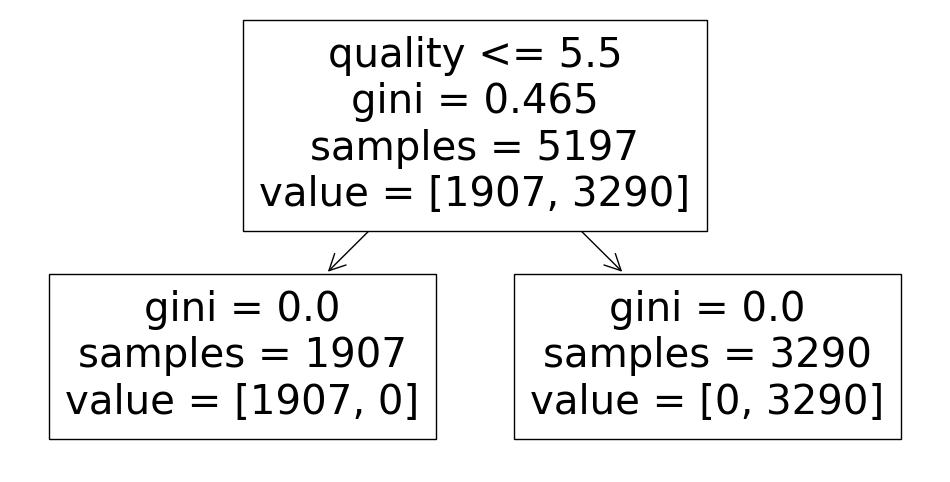

In [46]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12,6))
tree.plot_tree(wine_tree, feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color']);

**quality 컬럼으로 taste 컬럼을 만들었는데 quality를 그대로 러닝에 사용해서 100퍼가 나온 것!**

In [47]:
#quality 컬럼도 빼고 다시
X = wine.drop(columns=['taste','quality'],axis=1)
Y = wine['taste']

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=13)


wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=13)

In [48]:
y_pred_tr = wine_tree.predict(X_train) #훈련데이터에 대한 정확도검증
y_pred_test = wine_tree.predict(X_test)

print('Train Acc:',accuracy_score(y_train,y_pred_tr))
print('Test Acc:',accuracy_score(y_test,y_pred_test))

Train Acc: 0.7294593034442948
Test Acc: 0.7161538461538461


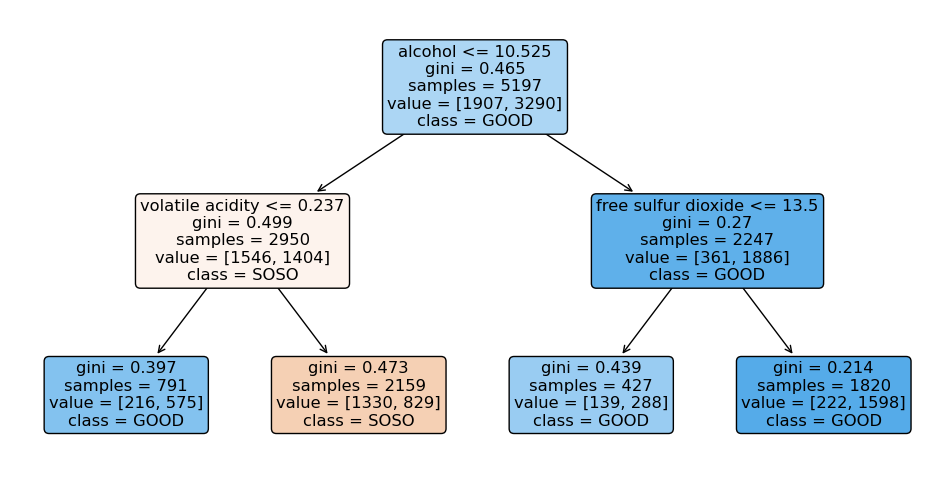

In [50]:
plt.figure(figsize=(12,6))
tree.plot_tree(wine_tree, feature_names=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'color'], filled=True,rounded=True,class_names=['SOSO','GOOD']);
plt.show()

- 알콜도수가 높고, 총 이산화황이 많아야 와인이 맛이 좋은거였네...?